# 05 (Programming) Line fitting by RANSAC


RANSAC is widely used in fitting models from sample points with outliers. Please implement a program to fit a straight 2D line using RANSAC from the following sample points:
(-2, 0), (0, 0.9), (2, 2.0), (3, 6.5), (4, 2.9), (5, 8.8), (6, 3.95), (8, 5.03), (10, 5.97), (12, 7.1), (13, 1.2), (14, 8.2), (16, 8.5), (18, 10.1). **Please show your result graphically.**

**ID**: *1750655*    
**Author:** *Jiajie Li*  
**E-mail:** *JJ@hgeek.net*

## 1 - Pre-processing

In [75]:
import math
import numpy as np
from random import sample
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
raw_data = np.array([(-2, 0), (0, 0.9), (2, 2.0), (3, 6.5), 
        (4, 2.9), (5, 8.8), (6, 3.95), (8, 5.03), 
        (10, 5.97), (12, 7.1), (13, 1.2), (14, 8.2), 
        (16, 8.5), (18, 10.1)])
raw_data_vis = data.transpose()
raw_data_vis

array([[-2.  ,  0.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  8.  , 10.  ,
        12.  , 13.  , 14.  , 16.  , 18.  ],
       [ 0.  ,  0.9 ,  2.  ,  6.5 ,  2.9 ,  8.8 ,  3.95,  5.03,  5.97,
         7.1 ,  1.2 ,  8.2 ,  8.5 , 10.1 ]])

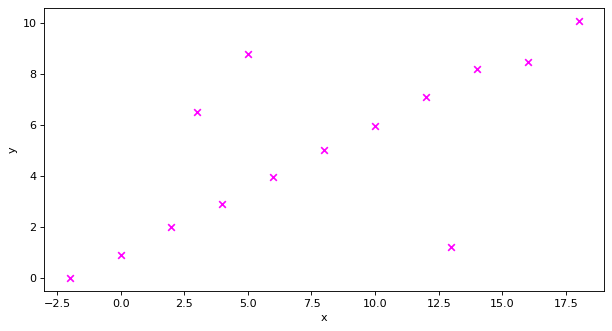

In [38]:
fig = plt.figure(figsize=(7,7), dpi= 80)
ax = fig.add_axes([0,0,1,1])
ax.scatter(raw_data_vis[0], raw_data_vis[1], c='magenta', marker='x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)

## 2 - Algorithm

### Step 0
Define the parameters and  constans

In [193]:
# model parameters

k = 0
b = 0
best_k = 0
best_b = 0
best_error = 999


# RANSAC parameters

s = 2 # sample size
S = raw_data
T_ratio = 0.8
T = round(len(S)*T_ratio) # threshold of the number of inliers
t = 0.5 # distance threshold for inliers
N = 10000 # max trials

# Constants - Auxiliary costants for plotting

x_min = -2.5
x_max = 17


### Step 1
Randomly select a sample(2 points) of s data points from S and instantiate the model from this subset

In [137]:
point_1, point_2 = random.sample(list(S), s)
k = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
b = point_1[1] - point_1[0] * k

f'k = {k}, b = {b}'

'k = 0.5174999999999998, b = 0.8900000000000015'

In [135]:
def get_line_plot(k, b):
    line_x = [x_min, x_max]
    line_y = [k * x_min + b, k * x_max + b]
    return np.array(line_x), np.array(line_y)

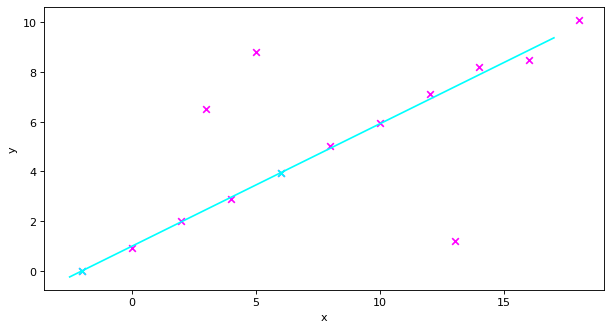

In [74]:
fig = plt.figure(figsize=(7,7), dpi= 80)
ax = fig.add_axes([0,0,1,1])
ax.scatter(raw_data_vis[0], raw_data_vis[1], c='magenta', marker='x')

ax.scatter(point_1[0], point_1[1], c='cyan', marker='x')
ax.scatter(point_2[0], point_2[1], c='cyan', marker='x')

line_x, line_y = get_line_plot(k, b)
ax.plot(line_x, line_y, c='cyan')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)

### Step 2
Determine the set of data points Si which are within a distance threshold t of the model. The set Si is the consensus set of the sample and defines the inliers of S.

In [77]:
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def point_distance_line(point,line_point1, line_point2):
    vec1 = line_point1 - point
    vec2 = line_point2 - point
    distance = np.abs(np.cross(vec1,vec2)) / np.linalg.norm(line_point1-line_point2)
    return distance


In [98]:
inlier_counter = 0
selected_points = []
for point in list(S):
    if point_distance_line(point, point_1, point_2) < t:
        inlier_counter += 1
        selected_points.append(point)
        
f'Inliers counts = {inlier_counter} Threshold = {T}', selected_points

('Inliers counts = 10 Threshold = 11',
 [array([-2.,  0.]),
  array([0. , 0.9]),
  array([2., 2.]),
  array([4. , 2.9]),
  array([6.  , 3.95]),
  array([8.  , 5.03]),
  array([10.  ,  5.97]),
  array([12. ,  7.1]),
  array([14. ,  8.2]),
  array([18. , 10.1])])

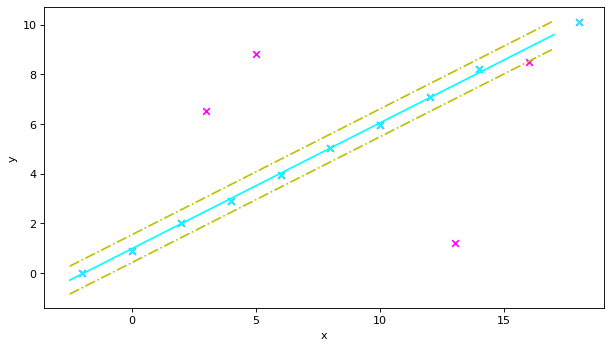

In [188]:
fig = plt.figure(figsize=(7,7), dpi= 80)
ax = fig.add_axes([0,0,1,1])
ax.scatter(raw_data_vis[0], raw_data_vis[1], c='magenta', marker='x')

for point in list(S):
    if point_distance_line(point, point_1, point_2) < t:
        ax.scatter(point[0], point[1], c='cyan', marker='x')

line_x, line_y = get_line_plot(k ,b)
ax.plot(line_x, line_y, c='cyan')

b_shift = t * math.sqrt(k**2+1) / 1
line_x, line_y = get_line_plot(k ,b + b_shift)
ax.plot(line_x, line_y, c='y', linestyle='-.')
line_x, line_y = get_line_plot(k ,b - b_shift)
ax.plot(line_x, line_y, c='y', linestyle='-.' )

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)

### Step 3, 4, 5
If the size of Si (the number of inliers) is greater than some threshold 
T, re‐estimate the model using all points in Si and terminate

If the size of Si is less than T, select a new subset and repeat the 
above

After N trials the largest consensus set Si is selected, and the model is 
re‐estimated using all points in the subset Si

In [250]:
best_error = 999

error_log = []
error_step = []
selected_points = []

for step in range(N):
    point_1, point_2 = random.sample(list(S), s)
    k = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
    b = point_1[1] - point_1[0] * k

    error = 0
    inlier_counter = 0
    cur_selected_points = []
    for point in list(S):
        error += point_distance_line(point, point_1, point_2)
        if point_distance_line(point, point_1, point_2) < t:
            inlier_counter += 1
            cur_selected_points.append(point)
            
    if error < best_error:
        best_p1 = point_1
        best_p2 = point_2
        best_error = error
        best_b = b
        best_k = k
        error_log.append(error)
        error_step.append(step)
        selected_points = cur_selected_points
        
    if inlier_counter >= T:
        break
    else:
        continue
        

Text(0, 0.5, 'error')

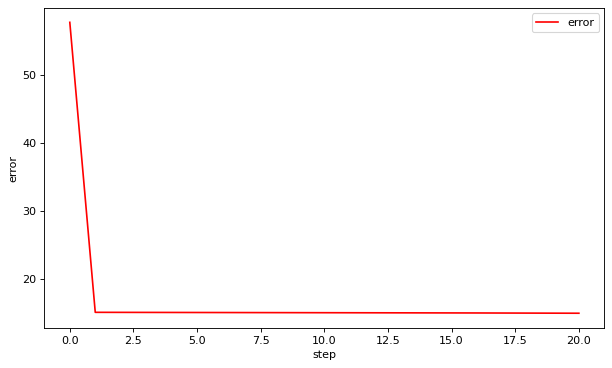

In [205]:
fig = plt.figure(figsize=(7,4), dpi= 80)
ax = fig.add_axes([0,0,1,1])

error, = ax.plot(error_step, error_log, c='red')


ax.legend([error], ['error'])

ax.set_xlabel('step')
ax.set_ylabel('error')


### Step 6
re‐estimated using all points in the subset Si

In [251]:
inlier_counter = 0
selected_points = []
    
x, y = get_line_plot(best_k, best_b)
point_1, point_2 = np.array([x[0], y[0]]), np.array([x[1], y[1]])
for point in list(S):
    if point_distance_line(point, point_1, point_2) < t:
        selected_points.append(point)

A = []
b = []
for point in selected_points:
    A.append([1, point[0]])
    b.append([point[1]])


print(f'A = \n{A}\n')
print(f'b = \n{b}\n')

A = np.array(A)
b = np.array(b)

ATA = A.T.dot(A)
inv_ATA = np.linalg.inv(ATA)
ATb = A.T.dot(b)

print(f'ATA = \n{ATA}\n')
print(f'inv_ATA = \n{inv_ATA}\n')
print(f'ATb = \n{ATb}\n')

solution = inv_ATA.dot(ATb)
print(f'solution = \n{solution}\n')
re_est_b, re_est_k = solution[0][0], solution[1][0]
print(f're_est_b = {re_est_b} re_est_k = {re_est_k}')

A = 
[[1, -2.0], [1, 0.0], [1, 2.0], [1, 4.0], [1, 6.0], [1, 8.0], [1, 10.0], [1, 12.0], [1, 14.0], [1, 16.0], [1, 18.0]]

b = 
[[0.0], [0.9], [2.0], [2.9], [3.95], [5.03], [5.97], [7.1], [8.2], [8.5], [10.1]]

ATA = 
[[  11.   88.]
 [  88. 1144.]]

inv_ATA = 
[[ 0.23636364 -0.01818182]
 [-0.01818182  0.00227273]]

ATb = 
[[ 54.65]
 [657.04]]

solution = 
[[0.97109091]
 [0.49963636]]

re_est_b = 0.9710909090909094 re_est_k = 0.49963636363636355


### Step 7
Plot the result

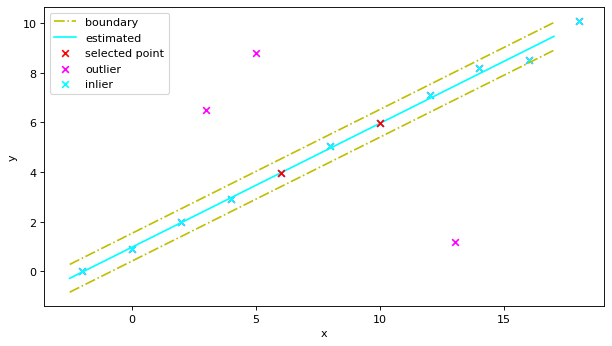

In [252]:
k = re_est_k 
b = re_est_b
x, y = get_line_plot(re_est_k, re_est_b)
point_1, point_2 = np.array([x[0], y[0]]), np.array([x[1], y[1]])

fig = plt.figure(figsize=(7,7), dpi= 80)
ax = fig.add_axes([0,0,1,1])
outlier = ax.scatter(raw_data_vis[0], raw_data_vis[1], c='magenta', marker='x')

for point in list(S):
    if point_distance_line(point, point_1, point_2) < t:
        inlier = ax.scatter(point[0], point[1], c='cyan', marker='x')
        
line_x, line_y = get_line_plot(k ,b)
estimated, = ax.plot(line_x, line_y, c='cyan')

b_shift = t * math.sqrt(k**2+1) / 1
line_x, line_y = get_line_plot(k ,b + b_shift)
inlier_bound, = ax.plot(line_x, line_y, c='y', linestyle='-.')
line_x, line_y = get_line_plot(k ,b - b_shift)
inlier_bound, = ax.plot(line_x, line_y, c='y', linestyle='-.')

selected_point = ax.scatter(best_p1[0], best_p1[1], c='red', marker='x', zorder=30)
selected_point = ax.scatter(best_p2[0], best_p2[1], c='red', marker='x', zorder=30)

ax.legend([inlier_bound, estimated, selected_point, outlier, inlier], ['boundary', 'estimated', 'selected point', 'outlier', 'inlier'])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect(1)